Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


load dataset

In [2]:
df = pd.read_csv('/home/samrawit/End-to-End-Insurance-Risk-Analytics-Predictive-Modeling/data/raw/MachineLearningRating_v3.txt', sep="|")

/tmp/ipykernel_146630/2651463851.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/samrawit/End-to-End-Insurance-Risk-Analytics-Predictive-Modeling/data/raw/MachineLearningRating_v3.txt', sep="|")


In [3]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [4]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
df.shape

(1000098, 52)

In [7]:
print(df.describe())

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

DAta Cleaning

In [8]:
print(df.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [9]:
print(df["Bank"])

0          First National Bank
1          First National Bank
2          First National Bank
3          First National Bank
4          First National Bank
                  ...         
1000093              ABSA Bank
1000094              ABSA Bank
1000095              ABSA Bank
1000096              ABSA Bank
1000097              ABSA Bank
Name: Bank, Length: 1000098, dtype: object


In [10]:
print(df["AccountType"])

0          Current account
1          Current account
2          Current account
3          Current account
4          Current account
                ...       
1000093    Savings account
1000094    Savings account
1000095    Savings account
1000096    Savings account
1000097    Savings account
Name: AccountType, Length: 1000098, dtype: object


In [11]:
print(df["MaritalStatus"]) 

0          Not specified
1          Not specified
2          Not specified
3          Not specified
4          Not specified
               ...      
1000093           Single
1000094           Single
1000095           Single
1000096           Single
1000097           Single
Name: MaritalStatus, Length: 1000098, dtype: object


In [12]:
print(df["Gender"])  

0          Not specified
1          Not specified
2          Not specified
3          Not specified
4          Not specified
               ...      
1000093             Male
1000094             Male
1000095             Male
1000096             Male
1000097             Male
Name: Gender, Length: 1000098, dtype: object


### Overall loss Ratio

In [13]:
overall_loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print(f'Overall Loss Ratio: {overall_loss_ratio}')

Overall Loss Ratio: 1.0477452570332202


### Calculate Loss Ratio by Province

In [ ]:

loss_ratio_by_province = df.groupby('Province').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())
print(loss_ratio_by_province)

Province
Eastern Cape     0.633813
Free State       0.680758
Gauteng          1.222018
KwaZulu-Natal    1.082693
Limpopo          0.661199
Mpumalanga       0.720897
North West       0.790367
Northern Cape    0.282699
Western Cape     1.059472
dtype: float64


/tmp/ipykernel_146630/2543951241.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_province = df.groupby('Province').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())


### Calculate Loss Ratio by Vehicle Type

In [ ]:

loss_ratio_by_vehicle = df.groupby('VehicleType').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())
print(loss_ratio_by_vehicle)

VehicleType
Bus                  0.137292
Heavy Commercial     1.628112
Light Commercial     0.232066
Medium Commercial    1.050251
Passenger Vehicle    1.048198
dtype: float64


/tmp/ipykernel_146630/1597893667.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_vehicle = df.groupby('VehicleType').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())


### Calculate Loss Ratio by Gender

In [ ]:

loss_ratio_by_gender = df.groupby('Gender').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())
print(loss_ratio_by_gender)

Gender
Female           0.821879
Male             0.883910
Not specified    1.059311
dtype: float64


/tmp/ipykernel_146630/248985192.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_by_gender = df.groupby('Gender').apply(lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum())


### Distribution of Key Financial Variables

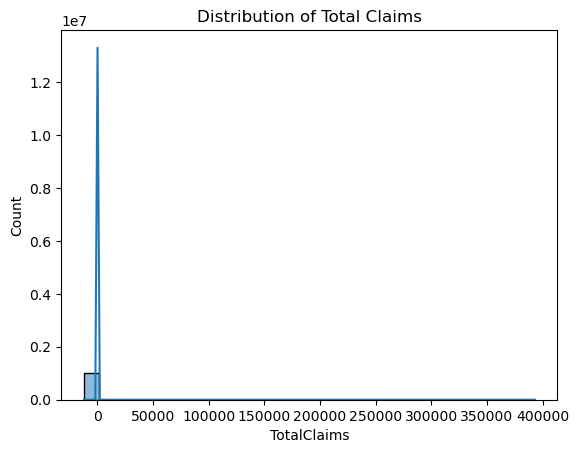

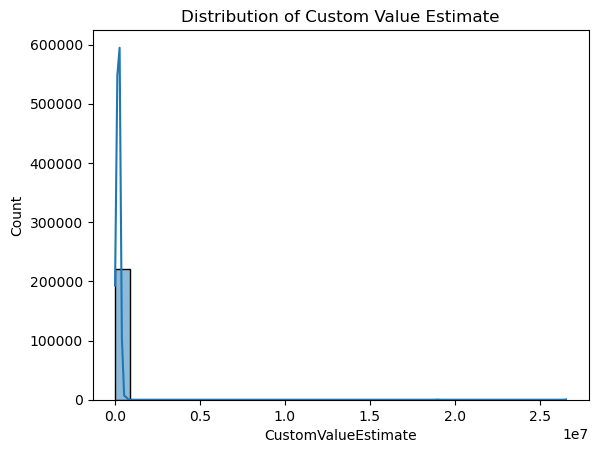

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of TotalClaims
sns.histplot(df['TotalClaims'], bins=30, kde=True)
plt.title('Distribution of Total Claims')
plt.show()

# Plot distribution of CustomValueEstimate
sns.histplot(df['CustomValueEstimate'], bins=30, kde=True)
plt.title('Distribution of Custom Value Estimate')
plt.show()

### BOX plot to identify outlier

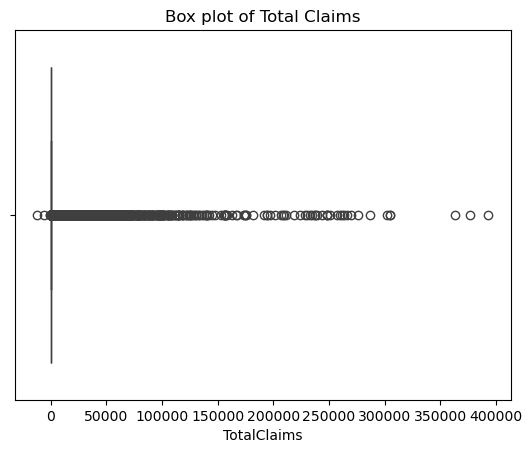

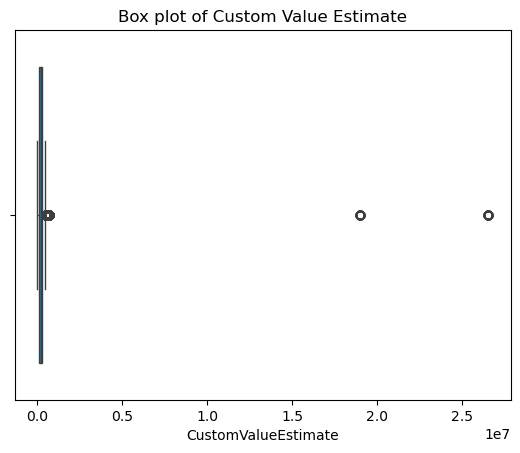

In [21]:
# Box plot for TotalClaims
sns.boxplot(x=df['TotalClaims'])
plt.title('Box plot of Total Claims')
plt.show()

# Box plot for CustomValueEstimate
sns.boxplot(x=df['CustomValueEstimate'])
plt.title('Box plot of Custom Value Estimate')
plt.show()

###  temporal trends

In [24]:
# TransactionMonth is in datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

### Aggregate Claims Over Time

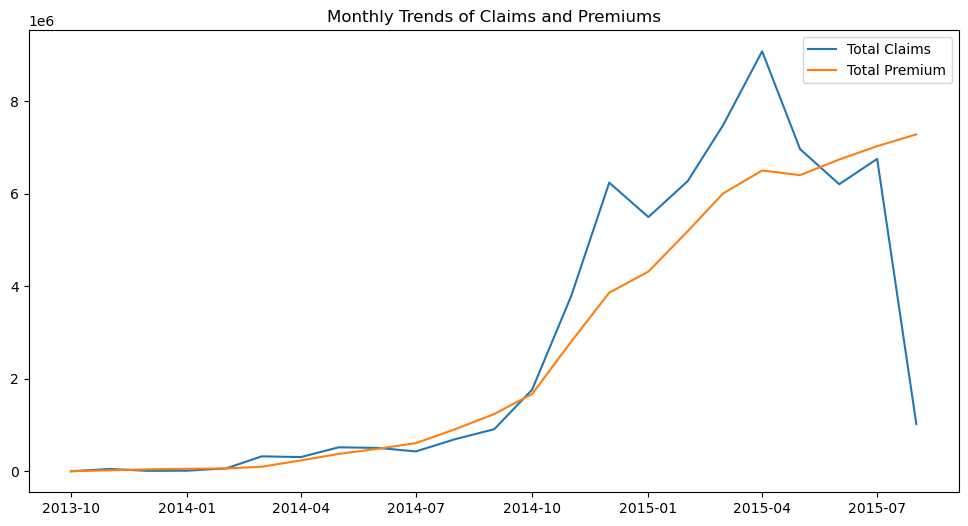

In [25]:
# Group by month and sum TotalClaims and TotalPremium
monthly_trends = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({'TotalClaims': 'sum', 'TotalPremium': 'sum'}).reset_index()
monthly_trends['TransactionMonth'] = monthly_trends['TransactionMonth'].dt.to_timestamp()

# Plot trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends['TransactionMonth'], monthly_trends['TotalClaims'], label='Total Claims')
plt.plot(monthly_trends['TransactionMonth'], monthly_trends['TotalPremium'], label='Total Premium')
plt.title('Monthly Trends of Claims and Premiums')
plt.legend()
plt.show()

### Vehicle Makes/Models Associated with Claims

In [26]:
# Calculate average claim amounts by make and model
average_claims = df.groupby(['make', 'Model'])['TotalClaims'].mean().reset_index()

# Identify highest and lowest claim amounts
highest_claims = average_claims.sort_values(by='TotalClaims', ascending=False).head(10)
lowest_claims = average_claims.sort_values(by='TotalClaims').head(10)

print('Highest Claim Amounts:')
print(highest_claims)

print('Lowest Claim Amounts:')
print(lowest_claims)

Highest Claim Amounts:
                                    make                        Model  \
311                               TOYOTA  L/CRUISER FJ 4.0 V6 CRUISER   
83                               HYUNDAI       H-1 2.5 CRDI WAGON A/T   
53                                  FIAT       DUCATO 2.3 JTD VETRATO   
394                           VOLKSWAGEN            POLO VIVO 1.6 5Dr   
130                        MERCEDES-BENZ                C180 BE COUPE   
162                        MERCEDES-BENZ        SPRINTER 312D F/C P/V   
246  SUZUKI                                             ERTIGA 1.4 GA   
337                               TOYOTA                 YARIS T1 3Dr   
4                                   AUDI  A4 1.8T S AVANT MULTITRONIC   
387                           VOLKSWAGEN         POLO 1.6 COMFORTLINE   

     TotalClaims  
311  5340.970273  
83   4118.181043  
53   1014.681021  
394   827.558882  
130   743.459027  
162   664.540138  
246   631.774519  
337   618.719846  
4 

/tmp/ipykernel_146630/379822761.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalClaims', y='Model', data=highest_claims, palette='viridis')
/tmp/ipykernel_146630/379822761.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalClaims', y='Model', data=lowest_claims, palette='plasma')


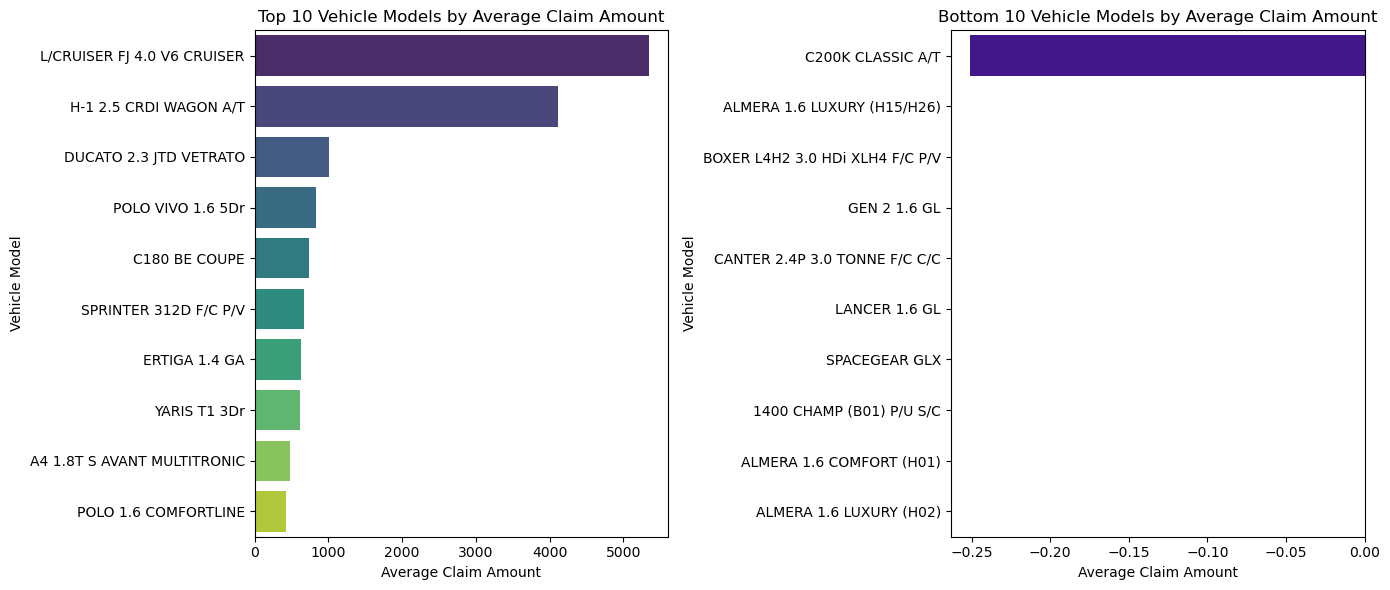

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average claim amounts by make and model
average_claims = df.groupby(['make', 'Model'])['TotalClaims'].mean().reset_index()

# Identify highest and lowest claim amounts
highest_claims = average_claims.sort_values(by='TotalClaims', ascending=False).head(10)
lowest_claims = average_claims.sort_values(by='TotalClaims').head(10)

# Set up the figure size
plt.figure(figsize=(14, 6))

# Plot Highest Claims
plt.subplot(1, 2, 1)
sns.barplot(x='TotalClaims', y='Model', data=highest_claims, palette='viridis')
plt.title('Top 10 Vehicle Models by Average Claim Amount')
plt.xlabel('Average Claim Amount')
plt.ylabel('Vehicle Model')

# Plot Lowest Claims
plt.subplot(1, 2, 2)
sns.barplot(x='TotalClaims', y='Model', data=lowest_claims, palette='plasma')
plt.title('Bottom 10 Vehicle Models by Average Claim Amount')
plt.xlabel('Average Claim Amount')
plt.ylabel('Vehicle Model')

# Show the plots
plt.tight_layout()
plt.show()